# Question 1

## (a) 

In this question we investigated whether the  standard error of the mean is a reliable statistic for indication the future  training and validation set targets. To do so, we first calculated their mean value and afterwards their Standard Error (SE) which is defined by the following type:

We first verified that the mean of the training set is actually zero, whereas the mean of the validation set was non zero and in particular was found to be $-0.22$. After calculating the SE of the mean we got the following result: <br>

    Validation set : -0.22 +/- 0.0129 
    

For comparison, we  calculated the mean and the standard error of the first 5785 training examples. 
The results we got was: <br>

    Training set: -0.44 +/- 0.0119
    
As we can observe, both means are non zero. Since we know the real mean of our data is zero we would expect to find a much bigger SE in order to approach more the true value. Instead we found that the mean is $22$ and $44$ times away from zero respectively. Given the fact that the mean of our sample follows Gaussian ditribution, the  true mean should fall between 22,44 deviations with almost 100% probability. To explain this behavior we plotted the histogram of the values of our training set. 



In [1]:
import scipy.io as sio
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import code_assign2 as cd

file_read = sio.loadmat("ct_data.mat",squeeze_me=True)
x_train = file_read["X_train"]
x_val  = file_read["X_val"]
x_test = file_read["X_test"]

y_train = file_read["y_train"]
y_val = file_read["y_val"]
y_test = file_read["y_test"]
y_train_mean = np.mean(y_train)
y_val_mean = np.mean(y_val)

# Mean of y_val with its standard error 

y_len = len(y_val)
y_val_var = np.std(y_val)

var_y_mean = y_val_var/sqrt(y_len)

# print("Validation SE:", float("%0.2f"%y_val_mean),"+/-", float("%0.4f"%var_y_mean))

# Mean of the first elements 5785 elements of y_train
size = 5785
y_train_var_size = np.std(y_train[:size])
y_train_var_of_mean = y_train_var_size/sqrt(size)

# print("Training SE:",float("%0.2f"%y_train_mean) ,"+/-", float("%0.4f"%y_train_var_of_mean))

y_train_mean = np.mean(y_train[:5785])

y_len = 5785
y_val_var = np.std(y_train[:5785])

var_y_mean = y_val_var/sqrt(5785)

# print()
# print("First 5785 training SE:", float("%0.2f"%y_train_mean),"+/-", float("%0.4f"%var_y_mean))



As we can see from the plots the training set it has indeed zero mean whereas the slice of the first 5785 data is negative biased and thus explains the negative mean we calculated. An explanation why the standard error is unrelialbe is that we mistakely assumed that the data are independent, which is not true if we pick sequential data. To resolve this issues we could permute the data and collect a slice of 5785 or randomly pick 5785 so they are no londer negative biased.  

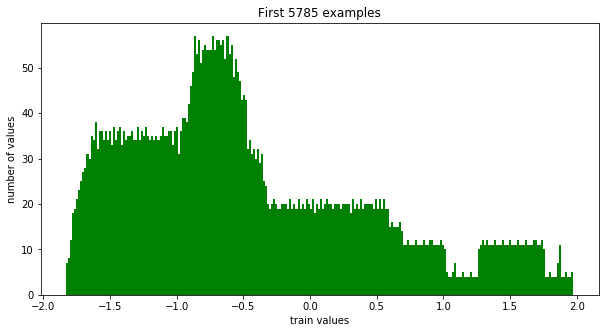

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.title("Data Distribution")

plt.subplot()

plt.hist(y_train[:5785],bins=250,color='green')
plt.title("First 5785 examples")
plt.xlabel('train values')
plt.ylabel('number of values')

plt.show()

## (b) 

The removed indexes we found were the following : $[ 69, 78, 79, 179, 188, 189, 199, 287, 351, 359]$. The indexes are zero - based.

In [3]:
x_mul = np.ones((x_train.shape[0],1))
x_mul[0::2] = -1

x_train_new = x_train*x_mul
x_vector = x_train_new.sum(0)

indexes = np.where(x_vector ==0)[0]
_,train_ind= np.unique(x_train,axis=1,return_index=True)

indices = np.unique(np.concatenate((train_ind, train_ind),0))
# print(np.setdiff1d(np.arange(384),indices))

x_train = np.delete(x_train,np.where(x_vector==0),axis=1)
x_val = np.delete(x_val,np.where(x_vector==0),axis=1)
x_test = np.delete(x_test,np.where(x_vector==0),axis=1)

_,train_ind= np.unique(x_train,axis=1,return_index=True)

train_ind.sort()
x_train = x_train[:,train_ind]
x_val = x_val[:,train_ind]
x_test = x_test[:,train_ind]


# Question 2
<br>
By applying the closed form solution of the squared sum error we got a train and validation error of $0.355758$ and $0.4205$ respectively. The gradient descent based solution scored  sligthly worse at $0.355759$ and $0.4206$. As we observe we haven't got the exact same results from the two algorithms even though they are very similar. That said this behavior is to be expected. First of all, the squared sum error function is convex and thus it has a unique minimum. The optimum minimum found by the python's library was caclulated from the closed form, whereas the gradient descent tried to approach this minimum. Thus the gradient can't be better. Furthermore, the gradients near the minimum approach zero and thus the gradient descent can't actually reach exacly the minimum. Another factor could be rounding errors made by the computer. 

    Least Square Closed Form:  
        Train Error       0.355758
        Validation Error  0.4205
    Gradient Descent:  
        Train Error       0.355759
        Validation Error  0.4206

In [35]:
weight_fitted,bias,error = fit_linreg(x_train,y_train)
weights_fitted_gradient,b = cd.fit_linreg_gradopt(x_train ,y_train,alpha=10)

y_pred = np.dot(x_train,weights_fitted_gradient)+b
error_gradient = sqrt(((y_pred - y_train)**2).mean())
compute_error_leastSquares = compute_error(x_val,y_val,weight_fitted,bias);
compute_error_gradient = compute_error(x_val,y_val,weights_fitted_gradient,b)

print("Least Square Closed Form: ",float("%0.4f"%error), float("%0.4f"%compute_error_leastSquares) )

print("Gradient Descent: ", float("%0.4f"%error_gradient), float("%0.4f"%compute_error_gradient) )


### The function used for this task are defined below:

    (1) fit_linreg(X,yy,alpha) 
    
    (2) compute_error(XX,yy,errors,biases)

In [7]:
def fit_linreg(X, yy, alpha=10):

    N = X.shape[0]
    D = X.shape[1]

    #Add one more column to the Design Matrix, to insert the bias 

    X_bias = np.concatenate([np.ones((X.shape[0],1)), X], axis=1) 

    #Create an Identity Matrix add added to the X_bias so regularization constant is added.

    identinty_matrix = np.eye(D+1)
    identinty_matrix = sqrt(alpha) * identinty_matrix
    
    # Remove bias normalization 
    identinty_matrix[0,:] = 0
    X_regularized  = np.concatenate((X_bias,identinty_matrix),axis=0)
    
    # Add a D vector to the outputs prediction, for regularization purposes
    y_regularized = np.append(yy,np.zeros(D+1))
    weights  = np.linalg.lstsq(X_regularized, y_regularized,rcond=0)[0]
    bias = weights[0]
    weights = weights[1:]

    # Root Square Mean error 
    y_pred = np.dot(X,weights) + bias
    error  = sqrt( ((y_pred - yy)**2).mean() )

    return weights,bias,error

def compute_error(X,yy,weights,bias):
    y_pred = np.dot(X,weights) +bias
    error  = sqrt( ((y_pred - yy)**2).mean() )
    return error

# Question 3

In this question we are applying dimensionality reduction to our data. This is a quick check to test whether our data are not too specific to our train set and thus that we are not overfitting the training set. That means we secrifise the train set accuracy in order to achieve better generalization. Since PCA reduces the features our data it reduces the  available information. The more dimensions we throw away the bigger the training error should get. This is because dimensonality reduction leads to less precise representation of our data. This is confirmed by our observations. The train and validation error we measured is listed below. <br>

    k = 10:

    Train error:       0.5729
    Validation error:  0.5717
    
    k = 100:

    Train error:       0.4106
    Validation error:  0.4328

In [33]:
x_train_mean = np.mean(x_train,0)
x_val_mean = np.mean(x_val,0)

x_train_zero_centered = x_train - x_train_mean
x_val_zero_centered = x_val - x_train_mean

PCA_10 = cd.pca_zm_proj(x_train_zero_centered,K=10)

train_PCA_vector = np.dot(x_train_zero_centered,PCA_10)
val_PCA_vector = np.dot(x_val_zero_centered,PCA_10)

weight_fitted,bias,error = fit_linreg(train_PCA_vector,y_train)

print("Train error: ",error)

compute_error_leastSquares = compute_error(val_PCA_vector,y_val,weight_fitted,bias)

print("Validation error: ",compute_error_leastSquares)

PCA_100 = cd.pca_zm_proj(x_train_zero_centered,K=100)

train_PCA_vector = np.dot(x_train_zero_centered,PCA_100)
val_PCA_vector = np.dot(x_val_zero_centered,PCA_100)

weight_fitted,bias,error = fit_linreg(train_PCA_vector,y_train)

print("Train error: ",error)

compute_error_leastSquares = compute_error(val_PCA_vector,y_val,weight_fitted,bias)

print("Validation error: ",compute_error_leastSquares)


## (b1)  Histogram - Visualization

By visualizing the data we observe that for each features slice a big percentage is distributed around $0$ or $-0.25$. In order to measure bias towards these two values we calculated this percentage. We present the results:

    Percentage of data points equal to -0.25:    13.6%
    Percentage of data points equal to 0:        66.78%

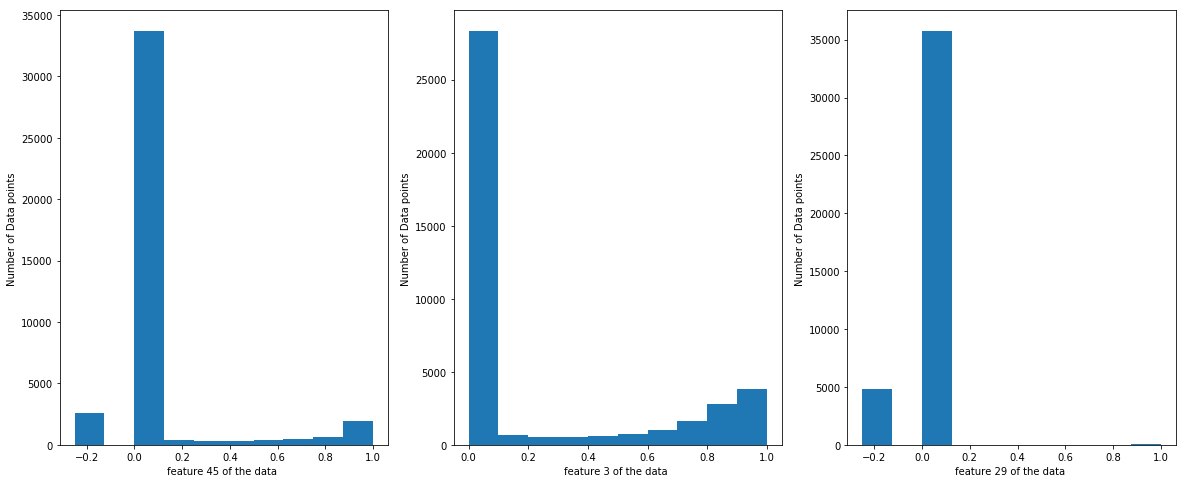

In [6]:
def k_feature(X,k):
    return X[:,k-1]


fig = plt.figure(figsize=(20, 8))
plt.title("Feature's Slice")
plt.subplot(1, 3, 1)
plt.xlabel("feature 45 of the data ")
plt.ylabel("Number of Data points ")

plt.hist(k_feature(x_train,46))

plt.subplot(1, 3, 2)
plt.xlabel("feature 3 of the data ")
plt.ylabel("Number of Data points ")

plt.hist(k_feature(x_train,4))

plt.subplot(1, 3, 3)
plt.xlabel("feature 29 of the data ")
plt.ylabel("Number of Data points ")

plt.hist(k_feature(x_train,30))
plt.show()

unique, counts = np.unique(x_train, return_counts=True)
dict1 = dict(zip(unique, counts))
total = x_train.shape[0] * x_train.shape[1]

print("Percentage of data points equal to -0.25:   ",float("%0.3f"% (dict1[-0.25]*100/total)),"%")
print("Percentage of data points equal to 0:       ", float("%0.3f"% (dict1[0]*100/total)),"%")


## (b2) Data Augmentation

After applying augmentation to our data we observer the following errors: 

    Train error:  0.3178 
    Validation error:  0.3769 
As we can observe the training error was reduced. This is to be expected because with data augmentation, provided we add valuable features, we make our data more fine-grained. These new binary features help το balance this bias towards the negative and zero values.Futhermore, if a feature has zero value it cancels out the attached weight resulting in this weight to have no contribution to the final prediction. Since almost 67% percent of our features are zeros, this has a big impact on the result.

In [12]:
aug_fn = lambda X: np.concatenate([X, X==0, X<0], axis=1) # Python

aug_train = aug_fn(x_train)
aug_val = aug_fn(x_val)

weight_fitted,bias,error = fit_linreg(aug_train,y_train)

print("Train error: ",float("%0.3f"% error))

compute_error_leastSquares = compute_error(aug_val,y_val,weight_fitted,bias);
print("Validation error: ",float("%0.3f"%compute_error_leastSquares))

# Question 4

### Invented classification tasks

PCA is a linear autoencoder and thus is linear map from  the initial  to the ”compressed” representantion of our features. While this could be a good latent space there are cases where linear transformation is not enough due to its linear limitations. Instead a non-linear map must be used, which is not constrained only in shifting and stretching the axis. The training error we achieved was $ 0.1383$ and the validation error was $ 0.2521$

    Train error:  0.1383
    Validation error:  0.2521

In [13]:
def sigmoid_function(X,weights,bias):
    y_pred = np.dot(X,weights) + b 
    sigma = 1/(1 + np.exp(-y_pred))
    return sigma


K = 10 # number of thresholded classification problems to fit
mx = np.max(y_train); mn = np.min(y_train); hh = (mx-mn)/(K+1)
thresholds = np.linspace(mn+hh, mx-hh, num=K, endpoint=True)
x_train_regression,x_valid_regression = np.empty([x_train.shape[0],10]),np.empty([x_val.shape[0],10])
ww_sigmoidal = np.empty([x_train.shape[1],10])
bias_sigmoidal = np.empty(10,)
log_regression_list = []
for kk in range(K):
    labels = y_train > thresholds[kk]
    ww,b = cd.fit_logreg_gradopt(x_train,labels,alpha=10)
    ww_sigmoidal[:,kk]=ww;bias_sigmoidal[kk]=b
    x_train_regression[:,kk] = sigmoid_function(x_train,ww,b)
    x_valid_regression[:,kk] = sigmoid_function(x_val,ww,b)

weight_fitted,bias,error = fit_linreg(x_train_regression,y_train)

print("Train error: ",float("%0.4f"% error))

compute_error_leastSquares = compute_error(x_valid_regression,y_val,weight_fitted,bias);

print("Validation error: ",float("%0.4f"% compute_error_leastSquares) )

Train error:  0.1383
Validation error:  0.2521


# Question 5 

The weights were initialized with a uniform distribution around zero, in the range $[-0.01,0.01]$ and biases were initialized to zero. After trying both the initialization methods we found that when the weights were pre-trained the neural network managed to reach a better validation error of $0.2551$, but not a substantially better than the one with the random initialization of $0.2593$. We report the train and the validatin error: 

    Networks init from Q4 fit results: 
        Train error: 0.1055 
        Validation Error 0.2551
    Networks randomly init were fit results: 
        Train error: 0.0992 
        Validation Error 0.2606


We also observed that when the network was trained jointly didn't achieve better results. 

In [31]:
ww,bb,w1,b1 = cd.fit_neural_network_gradopt((weight_fitted,bias,ww_sigmoidal.T,bias_sigmoidal),x_train,y_train,alpha=10)

y_pred = cd.nn_cost((ww,bb,w1,b1),x_train)
error_train = sqrt(((y_pred-y_train)**2).mean())

y_pred = cd.nn_cost((ww,bb,w1,b1),x_val)
error_val = sqrt(((y_pred-y_val)**2).mean())

print("Networks init from Q4 fit results : ")
print("    Train error:", float("%0.4f"% error_train) ,"Validation Error", float("%0.4f"% error_val))

random_weight =  np.random.uniform(-1,1,weight_fitted.shape[0])*0.01
random_bias =  0
random_ww_sigmoidal =  np.random.uniform(-1,1,(ww_sigmoidal.shape[0],ww_sigmoidal.shape[1]))*0.01
random_bias_sigmoidal =  np.zeros(bias_sigmoidal.shape[0])


ww,bb,w1,b1 = cd.fit_neural_network_gradopt((random_weight,random_bias,random_ww_sigmoidal.T,random_bias_sigmoidal),x_train,y_train,alpha=10)

y_pred = cd.nn_cost((ww,bb,w1,b1),x_train)
error_train = sqrt(((y_pred-y_train)**2).mean())


y_pred = cd.nn_cost((ww,bb,w1,b1),x_val)
error_val = sqrt(((y_pred-y_val)**2).mean())

print("Networks randomly init were fit results : ")
print("    Train error:", float("%0.4f"% error_train) ,"Validation Error", float("%0.4f"% error_val))


# Question 6

We know that given enough parameters a network can approximate almost any function. Since the number of data we have are enough, adding more complexity to the network could help it generalize better since it could approximate a more complex function. There are various ways which could increase the complecity of a network. One is increasing the number of parameters. This can be easily done by increasing the depth of the network or/and the width of the layers. Adding more layers can help the network create more high level represenation of the data so, we decided to increase the network's depth. We did so, by adding another hidden layer between the input and the first hidden layer.For the activation function we used the sigmoid as before. We then experimented on the width of the hidden layers. We tried multiple combinations for the number of neurons at each level $\{(50,10),(100,10), (150,20), (250,50)\}$. We also tried to change the value of the regularization factor. Even though we tried other initialization distributions for the weights (e.g normal Gauss) we didn't get any better results and hence the weights and the biases were initialized as before. To evaluate our system we tested the validation error. We found the best validation error of $0.2424$ for the following set-up: 

    1st hidden layer's width: 150
    2nd hidden layer's width: 20
    alpha: 2


In [8]:
import Trial as cd1
import numpy as np

first_layer_params = 150 
second_layer_params = 20 


#1st Sigmoid Layer Weights and biases 
random_ww_sigmoidal1 =  np.random.uniform(-1,1,(373,first_layer_params))*0.01
random_bias_sigmoidal1 =  np.zeros(first_layer_params)

#2nd Sigmoid Layer Weights and biases 
random_ww_sigmoidal2 =  np.random.uniform(-1,1,(first_layer_params,second_layer_params))*0.01
random_bias_sigmoidal2 =  np.zeros(second_layer_params)

#Output Layer Weights 
random_weight =  np.random.uniform(-1,1,second_layer_params)*0.01
random_bias =  0

ww,bb,w2,b2,w1,b1 = cd1.fit_neural_network_gradopt((random_weight,random_bias,random_ww_sigmoidal2.T,random_bias_sigmoidal2,random_ww_sigmoidal1.T,random_bias_sigmoidal1),x_train,y_train,alpha=2)
y_pred = cd1.nn_cost((ww,bb,w2,b2,w1,b1),x_val)
error_train = sqrt(((y_pred-y_val)**2).mean())


print("Networks randomly init were fit results : ")
print(float("%0.4f"% error_train))

To create this new architecture we modified the following functions: 

    (1) fit_neural_network_gradopt()
    (2) nn_cost()

Their implementation can be seen in the following block:


In [13]:
def fit_neural_network_gradopt(params,X, yy, alpha):

    start_time = time.time()
    args = (X, yy, alpha)
    init = params
    ww, bb, ww_sigmoidal2,bb_sigmoida2, ww_sigmoidal1,bb_sigmoidal1 = minimize_list(nn_cost, init, args)
    elapsed_time = time.time() - start_time
    return ww, bb, ww_sigmoidal2,bb_sigmoida2, ww_sigmoidal1,bb_sigmoidal1


def nn_cost(params, X, yy=None, alpha=None):
  
    ww, bb, V, bk, in_w, in_b = params

    # Forwards computation of cost

    A = np.dot(X, in_w.T) + in_b[None,:] 

    A1 = 1 / (1 + np.exp(-A))
    
    A2 = np.dot(A1,V.T) + bk[None,:]

    P = 1 / (1 + np.exp(-A2)) 

    F = np.dot(P, ww) + bb 

    if yy is None:
        # user wants prediction rather than training signal:
        return F
    res = F - yy # N,
    E = np.dot(res, res) + alpha*(np.sum(V*V) + np.dot(in_w) + np.dot(ww,ww)) # 1x1

    # Reverse computation of gradients

    #Gradient of output Layer
    F_bar = 2*res

    #1st hidden layer
    ww_bar = np.dot(P.T, F_bar) + 2*alpha*ww
    bb_bar = np.sum(F_bar) 
    P_bar = np.dot(F_bar[:,None], ww[None,:]) 

    #2nd hidden layer
    A2_bar = P_bar * P * (1 - P) 
    V_bar = np.dot(A2_bar.T, A1) + 2*alpha*V 
    bk_bar = np.sum(A2_bar, 0)

    #Input Layers
    A1_bar = np.dot(A2_bar, V) 
    A_bar = A1_bar *  A1 * (1 - A1)  
    in_w_bar =  np.dot(A_bar.T, X) + 2*alpha*in_w 
    in_b_bar =  np.sum(A_bar, 0)


    return E, (ww_bar, bb_bar, V_bar, bk_bar,in_w_bar,in_b_bar)